In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)
len(recent_date[0])

('2017-08-23',)


10

In [10]:

month_int = ""
day_int = ""

#Loop through the recent date variable to save sections of the string
#to use in dt.date function later.
for index, letter in enumerate(recent_date[0]):
    if index == 5 or index == 6:
        month_int = month_int + letter
        
    if index == 8 or index == 9:
        day_int = day_int + letter
        
print(month_int)
print(day_int)


a_month = relativedelta(months=1)
date_format = dt.date(int(recent_date[0][0:4]), int(month_int), int(day_int))
prev_year_date = date_format - (a_month * 12)
print(prev_year_date)

08
23
2016-08-23


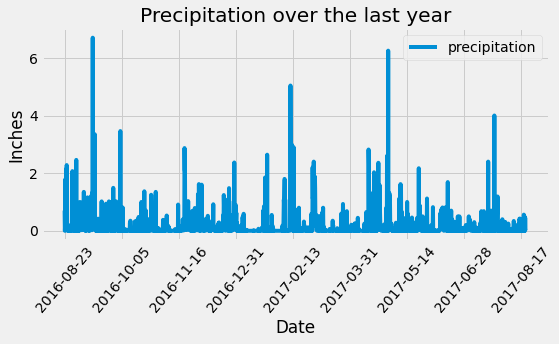

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_format = dt.date(int(recent_date[0][0:4]), int(month_int), int(day_int))
prev_year_date = date_format - (a_month * 12)


# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]

last_year_prcp = session.query(*sel).filter(Measurement.date >= prev_year_date).\
order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(last_year_prcp)
year_prcp_df = year_prcp_df.set_index('date')
year_prcp_df = year_prcp_df.dropna()
year_prcp_df = year_prcp_df.rename(columns={"prcp": "precipitation"})

# Sort the dataframe by date
year_prcp_df = year_prcp_df.sort_index(ascending=True)


x_axis = year_prcp_df.index
y_axis = year_prcp_df["precipitation"]


year_prcp_df.plot(figsize=(8,5))

plt.xticks(rotation=50)
plt.title("Precipitation over the last year")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.tight_layout()
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
len(session.query(Measurement.station).group_by(Measurement.station).all())

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

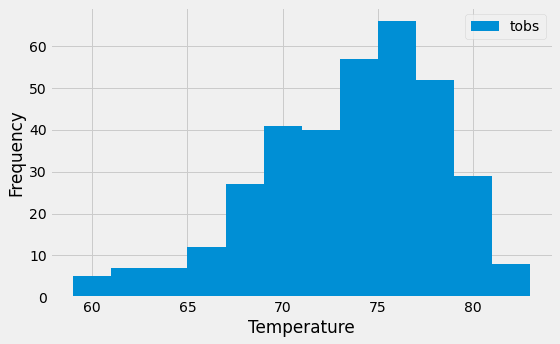

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#bins = [date_format - (a_month * 12), date_format - (a_month * 11), date_format - (a_month * 10), 
#        date_format - (a_month * 9), date_format - (a_month * 8), date_format - (a_month * 7),
#        date_format - (a_month * 6), date_format - (a_month * 5), date_format - (a_month * 4), 
#        date_format - (a_month * 3), date_format - (a_month * 2), date_format - (a_month * 1), date_format]

#bin_labels = ["12 months prior", "11 months prior", "10 months prior", "9 months prior",
#              "8 months prior", "7 months prior", "6 months prior", "5 months prior",
#              "4 months prior", "3 months prior", "2 months prior", "1 months prior",]
    
sel = [Measurement.date, Measurement.tobs]

last_year_tobs = session.query(*sel).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date > prev_year_date).\
order_by(Measurement.date.desc()).all()

year_tobs_df = pd.DataFrame(last_year_tobs)
year_tobs_df = year_tobs_df.dropna()

year_tobs_df.plot.hist(bins=12, figsize=(8,5))
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [17]:
# Close Session
session.close()